# Apple Mobility Trends

The data is geographically divided into countries/regions, but does have some greater specificity in some larger/capitol cities. The data is broken down into two main categories: walking and driving. This data set measures the change in routing requests since January 13, 2020 across those two categories on a daily abases and per geographical division. A full data description can be found on the Apple web site.  
  
This data is sourced daily from the Apple website and is then enriched with other publicly available information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
apple_mobility = pd.read_csv(r'C:\Users\Jagruti\Downloads\applemobilitytrends-2022-03-29.csv')

C:\Users\Jagruti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
apple_mobility.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,193.82,NaN,177.83,157.57,156.23,172.90,205.72,190.17,158.89,157.67
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,165.97,NaN,196.29,211.90,211.98,218.89,236.03,184.78,211.00,217.27
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,101.39,NaN,103.65,127.38,96.29,136.78,142.78,101.33,100.46,99.95
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,108.77,NaN,129.12,150.03,106.09,154.79,152.62,98.59,124.06,120.76
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,124.50,NaN,128.45,134.63,143.76,139.46,115.83,120.22,123.27,128.47


In [4]:
apple_mobility.shape

(4691, 813)

In [5]:
apple_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Columns: 813 entries, geo_type to 2022-03-29
dtypes: float64(807), object(6)
memory usage: 29.1+ MB


In [6]:
apple_mobility.describe(include='all')

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29
count,4691,4691,4691,1044,3329,4538,4652.0,4652.000000,4652.000000,4652.00000,...,4652.000000,0.0,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000
unique,4,2325,3,519,162,47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,county,Washington County,driving,AU,Texas,United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2638,27,3048,3,241,3102,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,100.0,101.871374,103.231726,107.07049,...,170.346866,NaN,160.821591,167.463022,178.342627,209.941064,212.506522,163.620301,163.644761,166.469645
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.303174,9.657535,10.96586,...,70.633356,NaN,57.187537,59.518474,63.800701,76.414884,85.766062,66.297590,59.796886,58.509464
min,NaN,NaN,NaN,NaN,NaN,NaN,100.0,29.530000,23.700000,29.47000,...,13.560000,NaN,12.590000,10.170000,12.590000,11.170000,16.110000,14.020000,15.940000,14.180000
25%,NaN,NaN,NaN,NaN,NaN,NaN,100.0,98.367500,98.977500,101.86000,...,134.822500,NaN,136.292500,142.647500,148.220000,172.462500,170.730000,131.975000,136.505000,140.450000
50%,NaN,NaN,NaN,NaN,NaN,NaN,100.0,101.960000,103.580000,106.96500,...,160.045000,NaN,157.765000,165.225000,176.225000,206.775000,205.875000,155.360000,159.875000,164.845000
75%,NaN,NaN,NaN,NaN,NaN,NaN,100.0,105.340000,107.510000,111.97250,...,194.190000,NaN,180.047500,186.590000,201.360000,239.255000,243.872500,185.130000,184.832500,187.132500


In [7]:
print(apple_mobility.geo_type.unique())
print(apple_mobility.transportation_type.unique())

['country/region' 'city' 'sub-region' 'county']
['driving' 'walking' 'transit']


In [8]:
print(apple_mobility.region.nunique())
regions = list(apple_mobility.region.unique())
print(regions)

2325
['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Vietnam', 'Aachen', 'Adelaide', 'Akron', 'Albany', 'Albuquerque', 'Allentown', 'Amsterdam', 'Anchorage', 'Ankara', 'Ann Arbor', 'Annapolis', 'Antioch', 'Antwerp', 'Athens', 'Atlanta', 'Auckland', 'Augsburg', 'Austin', 'Bakersfield', 'Baltimore', '

In [9]:
apple_total_mob_per_day = apple_mobility.groupby(['region']).sum().reset_index()
apple_total_mob_per_day

,region,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29
0,Aachen,200.0,199.26,200.54,202.71,216.51,233.26,184.34,211.21,200.35,...,246.90,0.0,296.38,296.21,295.76,350.79,344.85,273.60,298.68,299.58
1,Abbeville County,100.0,110.87,112.13,119.64,147.90,118.02,89.97,114.80,119.35,...,199.51,0.0,222.02,233.59,242.50,249.51,241.37,193.13,204.21,221.25
2,Abruzzo Region,200.0,203.69,206.59,216.30,215.20,264.01,220.81,210.22,202.61,...,297.54,0.0,311.40,301.46,322.76,357.63,427.81,327.02,304.51,310.40
3,Acadia Parish,100.0,115.17,120.94,124.35,153.41,135.03,103.72,115.92,115.34,...,200.07,0.0,134.57,193.05,231.14,239.80,245.71,181.62,194.94,179.42
4,Accomack County,100.0,98.93,99.53,107.75,142.90,103.14,109.17,113.61,93.73,...,208.82,0.0,181.95,175.56,187.81,251.78,216.98,203.55,182.07,181.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,Île-de-France Region,300.0,306.96,310.58,333.54,330.63,357.23,262.99,263.29,264.05,...,403.66,0.0,401.61,415.95,436.35,481.98,563.52,422.70,375.45,380.72
2321,Örebro County,200.0,199.81,211.74,214.28,251.83,251.92,228.26,238.57,226.01,...,309.76,0.0,285.07,304.44,377.77,391.00,424.09,323.40,306.57,297.25
2322,Östergötland County,200.0,198.05,203.76,206.03,220.91,233.33,220.63,225.26,215.51,...,276.05,0.0,286.05,295.89,297.68,353.47,357.88,280.88,288.25,288.83
2323,Ústí nad Labem Region,100.0,101.57,107.63,112.87,120.32,126.19,113.47,102.87,103.33,...,192.86,0.0,154.74,158.39,163.09,192.77,205.55,180.71,162.98,152.35


In [10]:
# defining a function for plotting out the cumulative mobility across all transport types for a given region/country in our data

def plot_mobility_total(region_country):
    apple_total_mob_per_day_region = apple_total_mob_per_day[apple_total_mob_per_day.region == region_country]
    apple_total_mob_per_day_region = apple_total_mob_per_day_region.drop(['region'], axis = 1)
    apple_total_mob_per_day_region = apple_total_mob_per_day_region.T
    apple_total_mob_per_day_region.columns = ['Cumulative Mobility across all transport']
    apple_total_mob_per_day_region.plot.line()

In [11]:
# defining function to take region name as input from the user.

def input_region():
    print('\nWhich region/country mobility report would you like to see?')
    region_name = input()
    if(region_name in regions):
        print('\nBelow plotted is the mobility report for the region/country: ', region_name)
        plot_mobility_total(region_name)
    else:
        print('\nData on this region/country is not available')
        print('\nWanna see the mobility plots of some other region/country ? Enter `Y` or `N`')


Which region/country mobility report would you like to see?
France

Below plotted is the mobility report for the region/country:  France


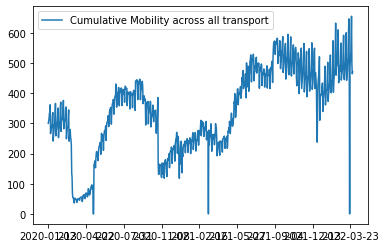

In [12]:
#plotting the input region

input_region()

The given plot is for the region France where we can observe the mobility of the users till date.


Which region/country mobility report would you like to see?
Germany

Below plotted is the mobility report for the region/country:  Germany


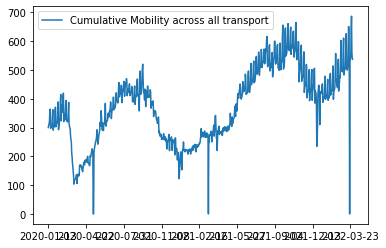

In [13]:
input_region()

The above observed plot is for the mobility of the region-Germany where fluctuations are observed till date


Which region/country mobility report would you like to see?
United States

Below plotted is the mobility report for the region/country:  United States


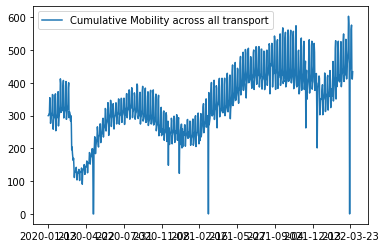

In [14]:
input_region()

The observations above are for the region-United States till date.

# Plots for mobility across transport types

In [15]:
apple_mobility.transportation_type.value_counts()

driving    3048
walking    1092
transit     551
Name: transportation_type, dtype: int64

From the observations observed we can notice that 3048 conntries/region have data for driving , 1092 country/ region have data for walking & 551 for the transit type.

In [16]:
#Break into countries/regions and cities
geo_mask = apple_mobility["geo_type"] == "country/region"
mobility_countries = apple_mobility[geo_mask]
mobility_cities = apple_mobility[~geo_mask]
print("There are a total of {} countires and {} cities with provided mobility data.".format(len(mobility_countries),
                                                                                           len(mobility_cities)))

There are a total of 153 countires and 4538 cities with provided mobility data.


In [17]:
def get_trans_count(df):
    name = df["geo_type"].iloc[0]
    return df["transportation_type"].value_counts().rename(str(name))
transport_types_count = pd.concat([get_trans_count(mobility_countries), get_trans_count(mobility_cities)], axis=1, sort=False)
transport_types_count

,country/region,city
driving,63,2985
walking,63,1029
transit,27,524


In [20]:
#Melt into timeseries
id_vars = ["geo_type", "region","transportation_type","sub-region","country"]
mobility_countries_melted = mobility_countries.melt(id_vars=id_vars,var_name="Date",value_name="pct_of_baseline")
mobility_cities_melted = mobility_cities.melt(id_vars=id_vars,var_name="Date",value_name="pct_of_baseline")
mobility_cities_melted.head()

,geo_type,region,transportation_type,sub-region,country,Date,pct_of_baseline
0,city,Aachen,driving,North Rhine-Westphalia,Germany,alternative_name,NaN
1,city,Aachen,walking,North Rhine-Westphalia,Germany,alternative_name,NaN
2,city,Adelaide,driving,South Australia,Australia,alternative_name,NaN
3,city,Adelaide,transit,South Australia,Australia,alternative_name,NaN
4,city,Adelaide,walking,South Australia,Australia,alternative_name,NaN


In [40]:
import plotly.express as px
#Make list of any cities to plot
to_show = ["Atlanta", "Athens", "London"]

#Plot
df = mobility_cities_melted[mobility_cities_melted["region"].isin(to_show)]
fig = px.line(df, x="Date", y="pct_of_baseline", color="transportation_type",
              line_group="region", hover_name="region")
fig.show()